# Radiation modes of slab waveguide

Again for the simple 3 layer structure: cladding-core-cladding.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact

%matplotlib widget
plt.style.use('dark_background')

In [2]:
A = SlabExact(ns=[1.2, 1.5, 1.2], Ts=[15, 2, 15], xrefs=[800,200,800], symmetric=True)

interactive(children=(FloatSlider(value=1e-11, description='Z', layout=Layout(width='90%'), max=1.0, min=1e-11…

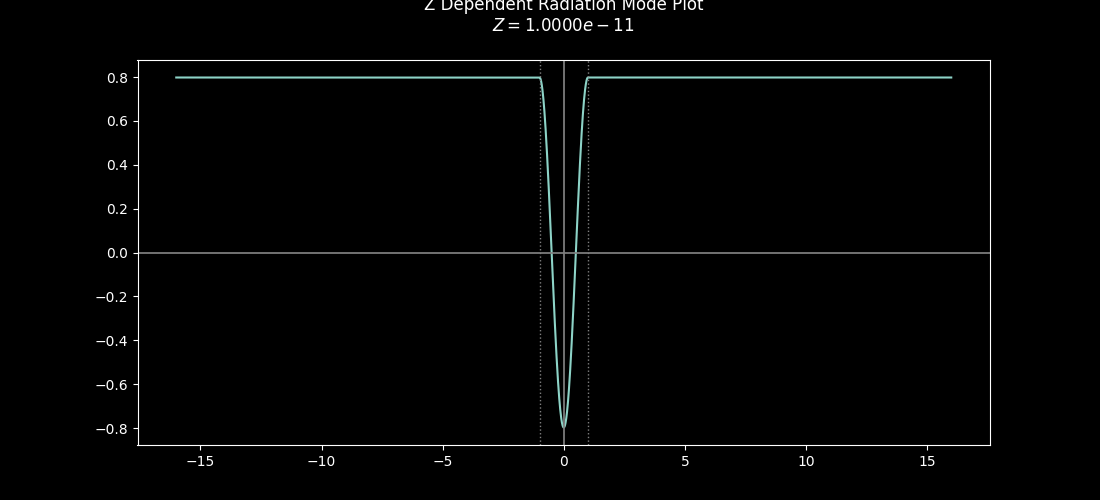

In [4]:
A.interactive_radiation_mode_plot(minZ=1e-11)

interactive(children=(FloatSlider(value=0.0001, description='Z', layout=Layout(width='90%'), max=6.0, min=0.00…

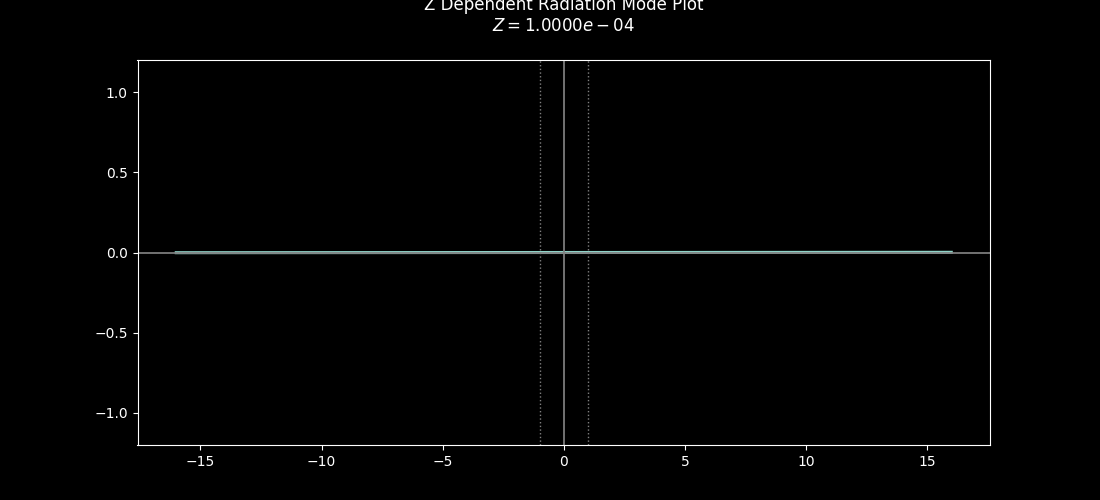

In [5]:
A.interactive_radiation_mode_plot(minZ=1e-4, maxZ=6, sign=-1, ylims=[-1.2, 1.2], linewidth=2.2)

# Hollow Core

In [6]:
B = SlabExact(scale=1e-5, Ts=[5, .25, 3, .25, 5],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[500, 100, 200, 100, 500],
              symmetric=True, wl=1e-6)

interactive(children=(FloatSlider(value=0.001, description='Z', layout=Layout(width='90%'), max=5.0, min=0.001…

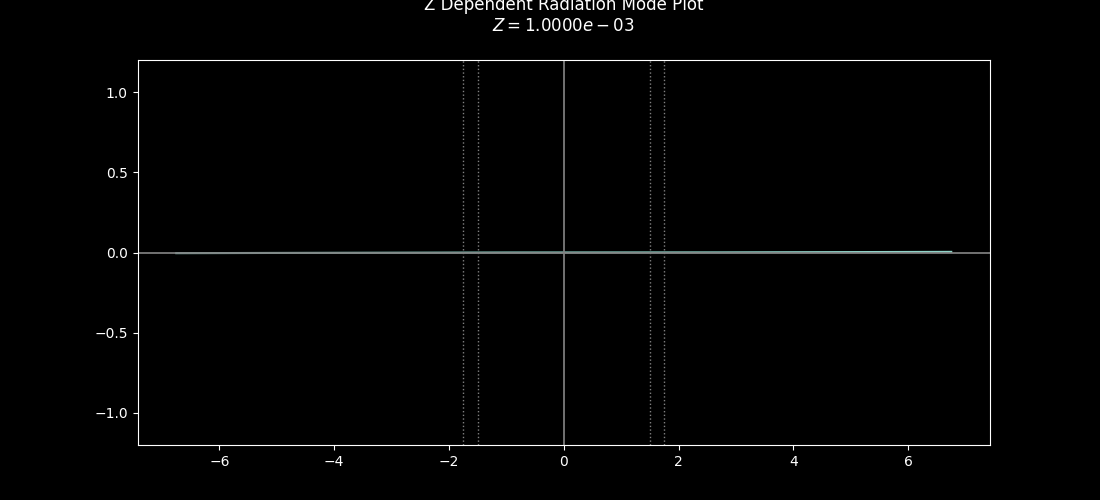

In [8]:
B.interactive_radiation_mode_plot(minZ=.001, maxZ=5, ylims=[-1.2, 1.2], sign=-1)

interactive(children=(FloatSlider(value=4e-07, description='Z', layout=Layout(width='90%'), max=0.0001, min=4e…

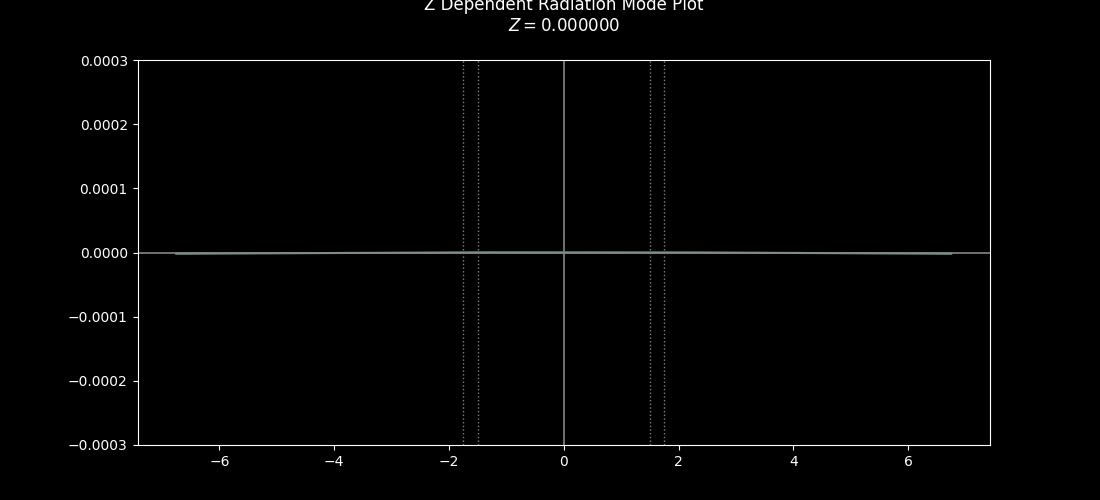

In [7]:
B.interactive_radiation_mode_plot(minZ=4e-7, maxZ=1e-4, ylims=[-.0003, .0003])

In [8]:
Zs = np.linspace(1e-7, 1, 1000)
ys = B.evaluate_fields_Z(Zs, 3, 0)

/home/pv/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/pv/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


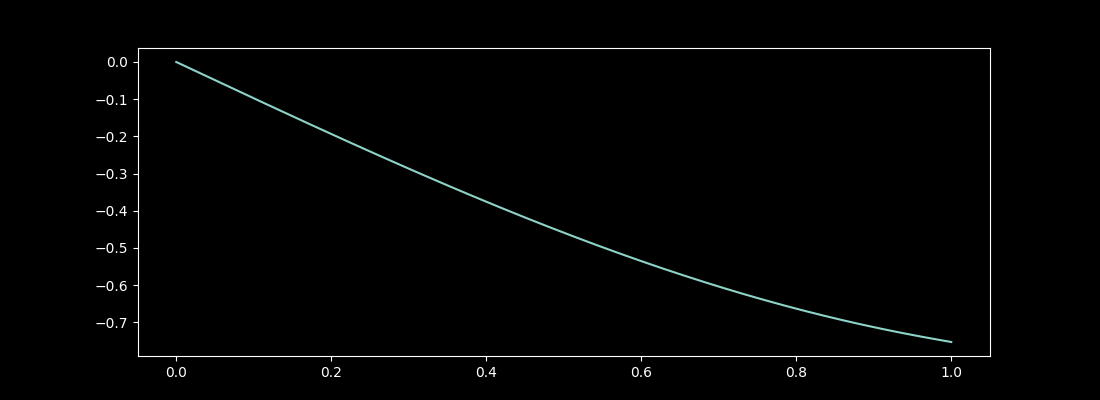

In [9]:
plt.close('all')
fig = plt.figure(figsize=(11,4))
plt.plot(Zs, ys)

In [15]:
Zs = np.linspace(1e-5, 1e-3, 1000)
ys = B.evaluate_fields_Z(Zs, 0, 0)

In [16]:
(ys[1:] - ys[:-1]) / (Zs[1:] - Zs[:-1])

array([-0.02278225-9.08181818e-05j, -0.02271665+2.42181818e-05j,
       -0.02283371-1.21090909e-05j, -0.02281555+4.03636364e-05j,
       -0.02270051-4.03636364e-06j, -0.02288114-4.03636364e-06j,
       -0.02275904-9.08181818e-06j, -0.02284784+4.03636364e-06j,
       -0.02273785+5.04545455e-06j, -0.02278729+1.71545455e-05j,
       -0.02273684-3.53181818e-05j, -0.02279435+6.05454545e-06j,
       -0.0227994 -6.05454545e-06j, -0.02282261+1.31181818e-05j,
       -0.02279335+6.05454545e-06j, -0.02279032-3.02727273e-05j,
       -0.02275702+3.02727273e-06j, -0.02280445+1.41272727e-05j,
       -0.02277417+2.11909091e-05j, -0.02283371-1.00909091e-05j,
       -0.02276206-6.05454545e-06j, -0.02279839+1.31181818e-05j,
       -0.02277922-2.62363636e-05j, -0.02278225+1.00909091e-06j,
       -0.02278729+1.31181818e-05j, -0.02280041-2.01818182e-05j,
       -0.02278527+1.51363636e-05j, -0.02282564-5.04545455e-06j,
       -0.02274693+1.51363636e-05j, -0.0228105 -6.05454545e-06j,
       -0.02276913+6.0545

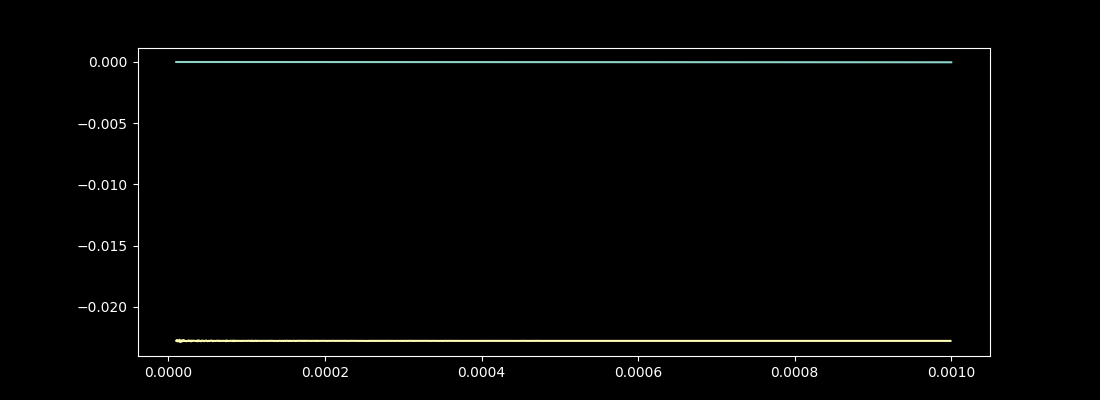

In [17]:
plt.close('all')
fig = plt.figure(figsize=(11,4))
plt.plot(Zs, ys)
plt.plot(Zs[:-1], (ys[1:] - ys[:-1]) / (Zs[1:] - Zs[:-1]))

In [22]:
dF = B.dFdZ_approx(5e-5, dZ=1e-7)

(<Figure size 1200x500 with 1 Axes>, <Axes: >)

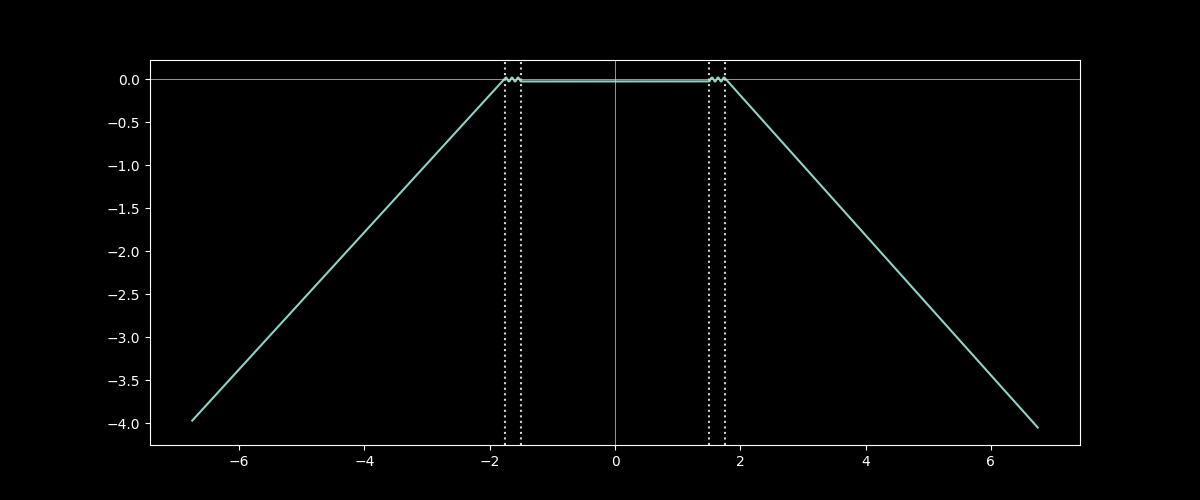

In [23]:
B.plot_field_1d(dF)

# Resonant/Near Resonant Hollow Core

In [25]:
C = SlabExact(scale=1e-5, Ts=[5, 1, 5, 1, 5],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[30, 50, 80, 50, 30],
              symmetric=True)

resonant_wls = 2 * C.Ts[1] *  np.array([1/l for l in range(1,9)]) * np.sqrt(C.n_high**2 - C.n0**2) * C.scale
C.wl = resonant_wls[2]

interactive(children=(FloatSlider(value=1e-13, description='Z', layout=Layout(width='90%'), max=1.0, min=1e-13…

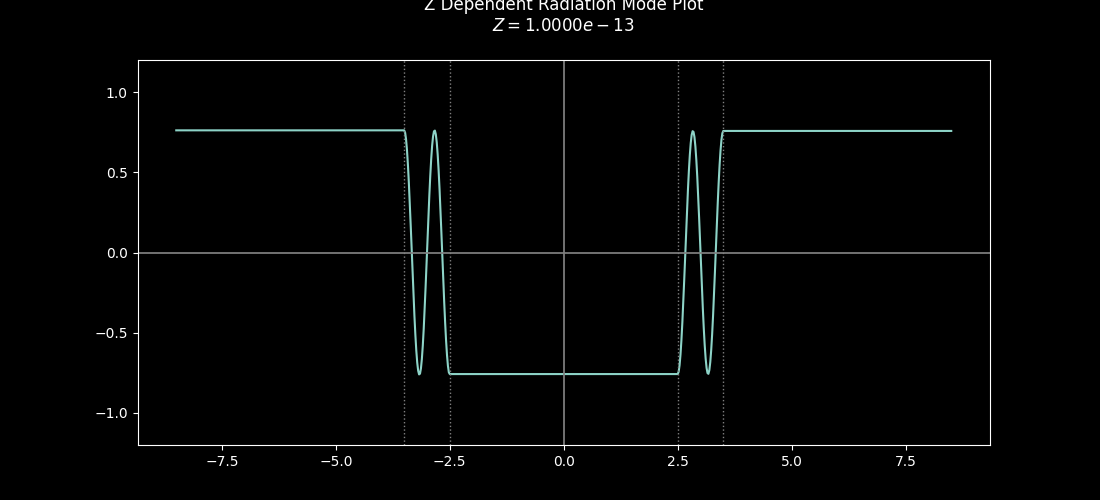

In [31]:
C.interactive_radiation_mode_plot(minZ=1e-13, maxZ=1, ylims=[-1.2, 1.2], sign=1)

In [119]:
Zs = np.linspace(1e-15, 1e-13, 1000)
ys = C.evaluate_fields_Z(Zs, 0, 0)

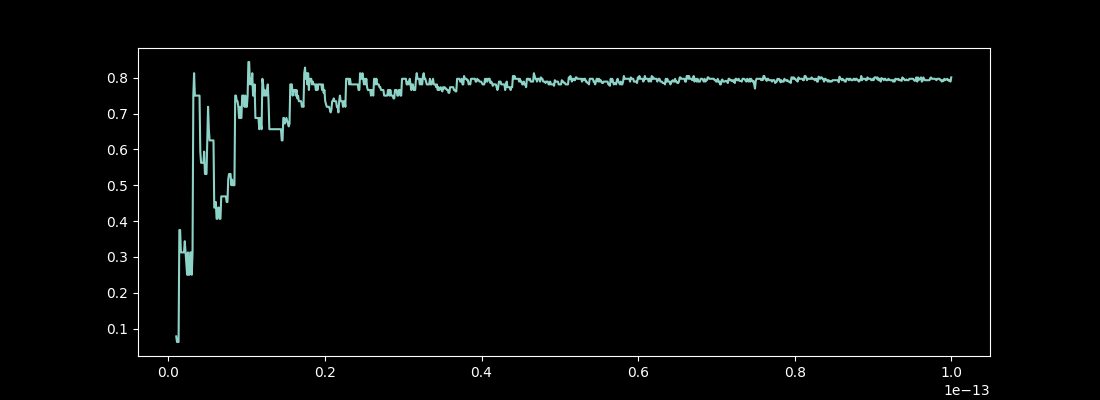

In [120]:
plt.close('all')
fig = plt.figure(figsize=(11,4))
plt.plot(Zs, ys)

In [60]:
Zs = np.linspace(1e-5, 1e-3, 1000)
ys = C.evaluate_fields_Z(Zs, 0, 0)

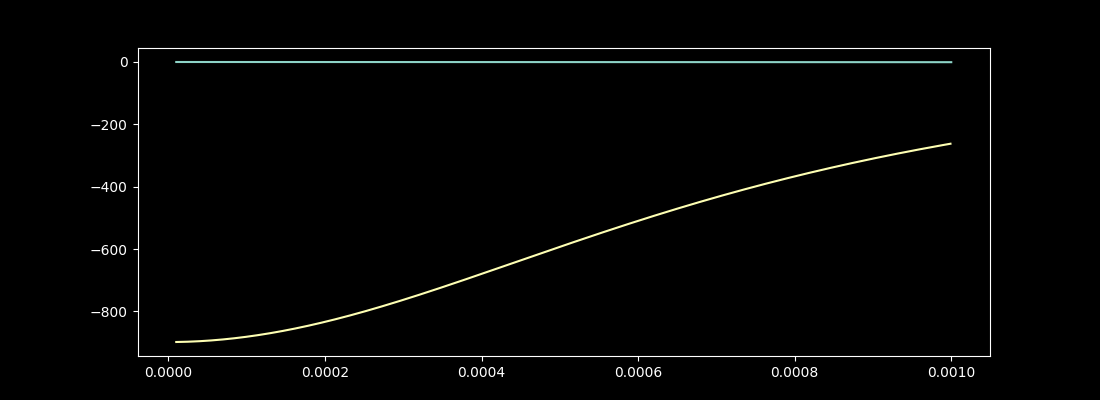

In [62]:
plt.close('all')
fig = plt.figure(figsize=(11,4))
plt.plot(Zs, ys)
plt.plot(Zs[:-1], (ys[1:] - ys[:-1]) / (Zs[1:] - Zs[:-1]))

In [71]:
dF = C.dFdZ_approx(1e-6, dZ=1e-7)

(<Figure size 1200x500 with 1 Axes>, <Axes: >)

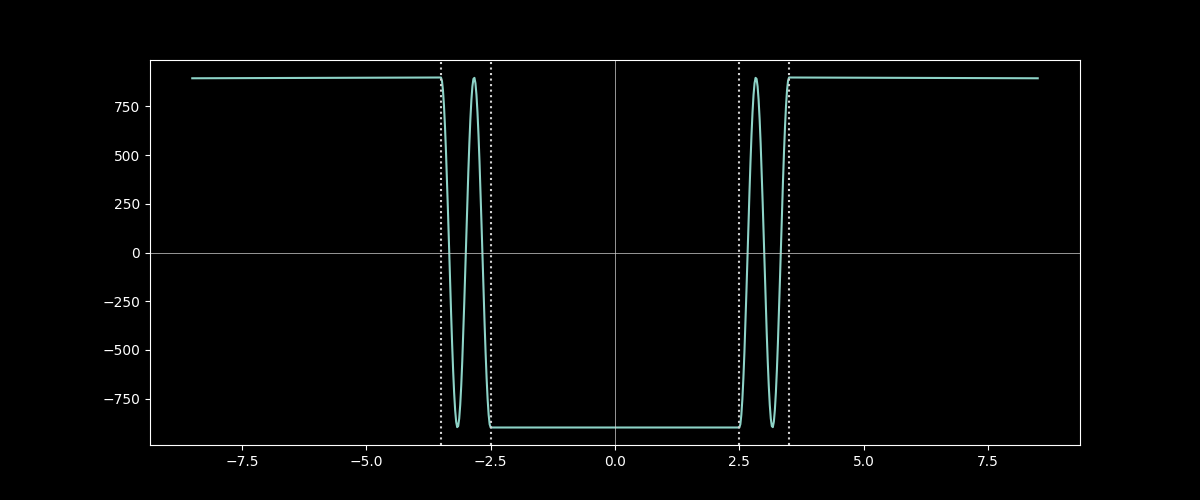

In [72]:
C.plot_field_1d(dF)